In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
df = pd.DataFrame(data=y,index=x,columns=['Sinus'])
df

,Sinus
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Répartition Train / Test


Note ! C'est très différent de notre méthodologie habituelle de répartition Entraînement / Test !

In [4]:
len(df)

501

In [5]:
test_percent = 0.1

In [6]:
len(df)*test_percent

50.1

In [7]:
test_point = np.round(len(df)*test_percent) #point coupure

In [8]:
test_point

50.0

In [9]:
test_ind = int(len(df) - test_point)

In [10]:
test_ind

451

In [11]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

## Mise à l'échelle des données

> Bloc en retrait

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
# Si warning, ignorez le, cest juste une conversion en float
# Adapter uniquement aux données d'entraînement, sinon nous trichons en supposant des informations sur les données test
scaler.fit(train)

MinMaxScaler()

In [15]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Phase entrainement

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [18]:
# définir un générateur
length = 25 # Longueur des séquences de sortie (en nombre de pas temporel)
batch_size = 1 # Nombre d'échantillons de séries temporelles dans chaque batch (lot)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)#scaled_train contient les données x et y

In [19]:
len(scaled_train)

451

In [20]:
len(generator) #cet objet generator va generer des batchs de données pour nous
# est scalé train soustrait de la longueur de la séquence

426

In [21]:
X,y = generator[0] #premier batch de données

In [22]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [23]:
y

array([[0.79923759]])

<Axes: >

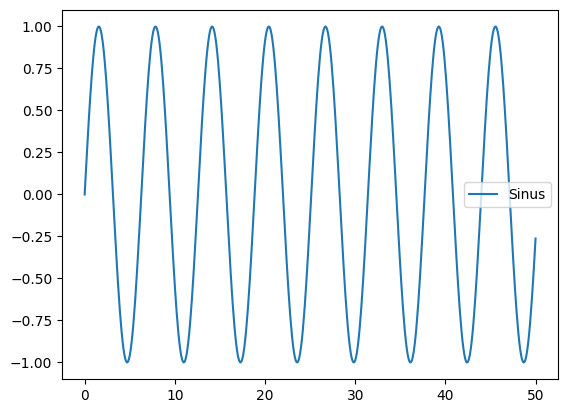

In [24]:
df.plot()

In [25]:
# définir un générateur
length = 50 # Longueur des séquences de sortie (en nombre de pas temporel)
batch_size = 1 # Nombre d'échantillons de séries temporelles dans chaque batch (lot)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)#scaled_train contient les données x et y

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [27]:
n_features = 1

In [28]:
model = Sequential()
model.add(SimpleRNN(50,input_shape=(length,n_features))) #50 neurones